# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [10]:
# find the encoding 

with open('Online_Retail.csv') as f:
    print(f)

<_io.TextIOWrapper name='Online_Retail.csv' mode='r' encoding='cp1252'>


In [11]:
# use the encoding to open the file

online_rt = pd.read_csv('Online_Retail.csv', encoding = 'cp1252')
online_rt.head()
online_rt.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
for x,y in enumerate(online_rt.columns):
    print(x, y)

0 InvoiceNo
1 StockCode
2 Description
3 Quantity
4 InvoiceDate
5 UnitPrice
6 CustomerID
7 Country


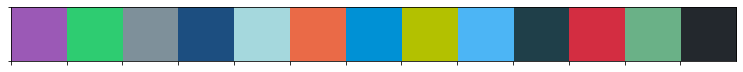

In [37]:
flatui = ["#9b59b6", "#2ecc71", '#7E909A', '#1C4E80', '#A5D8DD', '#EA6A47', '#0091D5','#B3C100', '#4CB5F5', '#1F3F49', '#D32D41', '#6AB187', '#23282D']
sns.palplot(sns.color_palette(flatui))

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [18]:
most_quant_country = online_rt.groupby('Country').sum().sort_values('Quantity', ascending=False).head(11)
country_barring_uk = most_quant_country.iloc[1:, 0]
top_10_df = pd.DataFrame(country_barring_uk)
top_10_df = top_10_df.sort_values('Quantity',ascending=False)

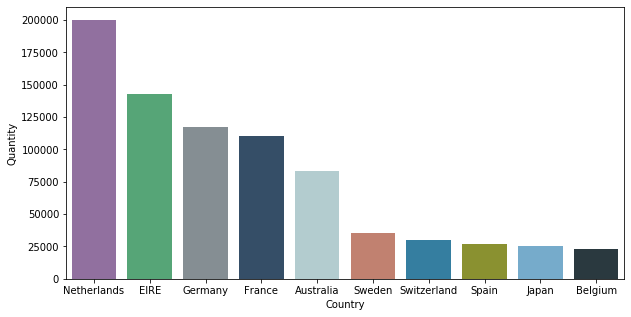

In [40]:
plt.figure(figsize=(10,5))
# plt.fig(figsize = fig_dims)
sns.barplot(x=top_10_df.index, y='Quantity', data=top_10_df, palette=flatui, saturation=0.5 )

### Step 5.  Exclude negative Quatity entries

In [14]:
online_rt_positive = online_rt[online_rt['Quantity'] > 0]
online_rt_positive.shape

(531285, 8)

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [15]:
online_rt_positive.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [18]:
online_rt_positive['Quantity Per Unit'] = online_rt_positive['UnitPrice'] * online_rt_positive['Quantity']
online_rt_positive.head()

C:\Users\HAZEEZ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity Per Unit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [33]:
online_rt_positive.groupby(['Country','CustomerID']).sum()

Quantity  UnitPrice  Quantity Per Unit
Country        CustomerID                                        
Australia      12386.0          354      23.91             401.90
               12388.0         1462     277.77            2780.66
               12393.0          816     145.90            1582.60
               12415.0        77670    2097.08          124914.53
               12422.0          195      51.12             386.20
...                             ...        ...                ...
United Kingdom 18287.0         1586     104.55            1837.28
Unspecified    12363.0          408      53.17             552.00
               12743.0          319     407.17             546.43
               14265.0          330     181.75             530.18
               16320.0          732     138.91            1038.46

[4347 rows x 3 columns]

### BONUS: Create your own question and answer it.